# **Project Name**    - Play Store App Review Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Team
##### **Team Member 1 -**Nikhil Singh
##### **Team Member 2 -**Keshav Kumar
##### **Team Member 3 -** Abhishek Bhalla
##### **Team Member 4 -**Jeetendra Thakur
##### **Team Member 5 -**Janhavi Jaiswal

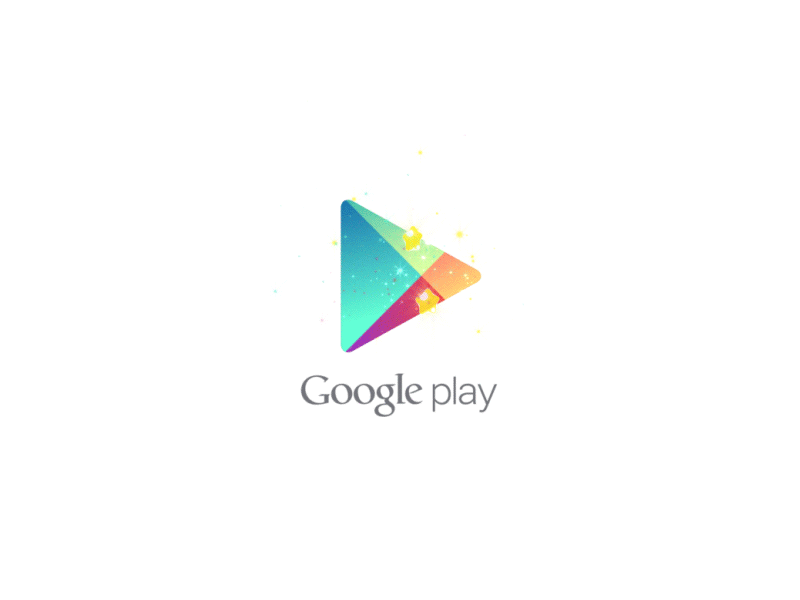

# **Project Summary -**

Our team presents an analysis of the Google Playstore. Almabetter Team provided the project with the datasets. User reviews and Playstore data analysis make up two of the datasets. This project was chosen in order to gain insight into the apps domain utilised in Android mobile devices and tablets. It is a difficult task.The research began with the concept of Playstore analysis and uploading both datasets. In order to extract the correct data from the datasets, we first cleaned them and made the necessary alterations. After all of this, we had the correct understanding of the project's objectives.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


#1.Which category of Apps from the Content Rating column are found more on playstore ?
#2.What are Play Store's top categories?
#3.What is the ratio of number of Paid apps and Free apps?
#4.Which category App's have most number of installs?
#5.what is the Average rating of the apps?
#6.what are the Count of Android version of each applications?
#7.Does Last Update date has an effects on rating?
#8.What are the Top 10 installed apps in any category?
#9.what is the percentage of Sentiment reviews of users?
#10.How is sentiment polarity varying for paid and free apps?
#11.Are sentiment subjectivity and sentiment polarity inversely correlated?
#12.How the sentiments subjectivity shows the user review experience?
#13.Is play store data propotionaly correlated?
#14.How Pairwise plot between each quantitative variable defines?

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

### Dataset Loading

In [ ]:
# Load Dataset
play_store_data=pd.read_csv('/content/Play Store Data.csv')
print(play_store_data)

In [ ]:
user_reviews=pd.read_csv('/content/User Reviews.csv')
print(user_reviews)

### Dataset First View

In [ ]:
# Dataset First Look
play_store_data.head(10)

In [ ]:
play_store_data.tail(10)

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
play_store_data.shape

In [ ]:
list(play_store_data.columns)

### Dataset Information

In [ ]:
# Dataset Info
play_store_data.info()


#### Duplicate Values

In [ ]:
# Handling the error values in the Play store data
play_store_data.head()

In [ ]:
# Dataset Duplicate Value Count
len(play_store_data[play_store_data.duplicated()])

In [ ]:
# dropping duplicates from the 'App' column.
play_store_data.drop_duplicates(subset = 'App', inplace = True)
play_store_data.shape

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
play_store_data.isnull().sum()

In [ ]:
# Visualizing the missing values
sns.heatmap(play_store_data.isnull(), cbar=False)

In [ ]:
play_store_data[play_store_data['Android Ver'].isnull()]

In [ ]:
play_store_data = play_store_data[play_store_data['Android Ver'].notna()] 

In [ ]:
play_store_data[play_store_data['Android Ver'].isnull()]

In [ ]:

play_store_data.isnull().sum()

In [ ]:
play_store_data = play_store_data[play_store_data['Current Ver'].notna()]


In [ ]:
play_store_data.isnull().sum()

In [ ]:
play_store_data[play_store_data['Type'].isnull()]

In [ ]:
play_store_data.loc[9148,'Type'] = 'Free'

In [ ]:
play_store_data.isnull().sum()

In [ ]:
rating_median = play_store_data['Rating'].median()

In [ ]:
rating_median

In [ ]:
play_store_data['Rating'].fillna(rating_median, inplace=True)

In [ ]:
play_store_data.isnull().sum()

### What did you know about your dataset?

Answer Here

### Dataset Loading- User_review dataframe

In [ ]:
# Load Dataset
user_reviews=pd.read_csv('/content/User Reviews.csv')
print(user_reviews)

### Dataset First View

In [ ]:
# Dataset First Look
user_reviews.head()

In [ ]:
user_reviews.tail()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
user_reviews.shape

In [ ]:
list(user_reviews.columns)

### Dataset Information

In [ ]:
# Dataset Info
user_reviews.info()


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(user_reviews[user_reviews.duplicated()])

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
user_reviews.isnull().sum()

In [ ]:
# Visualizing the missing values
sns.heatmap(user_reviews.isnull(), cbar=False)

In [ ]:
user_reviews[user_reviews['Translated_Review'].isnull()]

In [ ]:
user_reviews = user_reviews[user_reviews['Translated_Review'].notna()] 

In [ ]:
user_reviews[user_reviews['Translated_Review'].isnull()]

In [ ]:
user_reviews.isnull().sum()

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
list(play_store_data.columns)

In [ ]:
# Dataset Describe
play_store_data.describe()

In [ ]:
# Dataset Information
play_store_data.info()

### Variables Description 

Exploring the columns
1.'App'- Application name

2.'Category'- The category to which app belongs to (Type of App)

3.'Rating'- Rating of the App in Play Store

4.'Reviews'- Number of reviews application got from users

5.'Size'- Size of the App (In KB/MB/GB...)

6.'Installs'- Number of times application installed by people

7.'Type'- App catgory either Free or Paid

8.'Price'- Applicaton price

9.'Content Rating'- A categorical rating of the app to indicate which age group it is suitable for.

10.'Genres'- Movie belongs to which Genre.(A subset of Category)

11.'Last Updated'- Last updated date of the application

12.'Current Ver'- Current latest available version of the app

13.'Android Ver'- It tells about the Minimum android version required to support the application.





### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
unique_value=play_store_data.columns
df2 = pd.unique(play_store_data[['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']].values.ravel())
print(df2)

So, as you can see these are the unique values in this dataset.

## 3. ***Data Wrangling***

We now move to data wrangling in this we will manipulate some columns in the data set as well as some data which are in string forms which will be converted into integer for further processing.

### Data Wrangling Code

 ***1.Last Update Column:-***

In [ ]:
# Changing the datatype of the Last Updated column from string to datetime.
# When the values in the last updated column are passed via Pandas' to datetime() function, the result is a string Date time that is converted into a Python Date time object.
play_store_data["Last Updated"] = pd.to_datetime(play_store_data['Last Updated'])
play_store_data.head()

***2.Reviews Column***:-

In [ ]:
# Changing the Reviews column's values' datatype from string to int.
play_store_data['Reviews'] = play_store_data['Reviews'].astype(int)
play_store_data.head()

***3.Installs Column:-***

In [ ]:
# Changing the Installs column's values from string to integer datatype.
# Checking the contents of the 'Installs' column
play_store_data['Installs'].value_counts()

If the "+" sign is present, we must first remove it from every entry before we can change the datatype of the Installs column's values from string to integer.

Using the convert plus function to change the string datatype of the values in the Installs column to a float datatype:-

In [ ]:
# Creating a function convert_plus which drops the '+' symbol if it is present and returns the output which is of integer datatype.

def convert_plus(val):
  '''
  This function drops the + symbol if present and returns the value with int datatype.
  '''
  if '+' and ',' in val:
    new = int(val[:-1].replace(',',''))
    return new
  elif '+' in val:
    new1 = int(val[:-1])
    return new1
  else:
    return int(val)

In [ ]:
# The drop_plus funtion applied to the main dataframe
play_store_data['Installs'] = play_store_data['Installs'].apply(lambda x: convert_plus(x))
play_store_data.head()

***4.Price Column:-***

In [ ]:
# Converting the Price column's datatype from string to float.
play_store_data['Price'].value_counts()

We must remove the $ symbol from all of the values before changing this column from a string to a float. After that, we may give those values the float datatype.

using the drop dollar function to change the Price column's values from string to float datatypes:-

In [ ]:
# Creating a function drop-dollar which dropps the $ symbol if it is present and returns the output which is of float datatype.
def convert_dollar(val):
  '''
  This funtion drops the $ symbol if present and returns the value with float datatype.
  '''
  if '$' in val:
    return float(val[1:])
  else:
    return float(val)

In [ ]:
# The drop_dollar funtion applied to the price column
play_store_data['Price']=play_store_data['Price'].apply(lambda x: convert_dollar(x))
play_store_data.head()

In [ ]:
play_store_data[play_store_data['Price']!=0].head()

The Price column's datatype was successfully changed from a string to a float.

***5.Size Column:-***

In [ ]:
# Changing the sizes in the Size column to the same measurement unit (MegaBytes(MB)).
play_store_data['Size'].value_counts()

We can observe that the Size column's values include information in many unit types. M and K stand for MB and KB, respectively. It is required to convert all the values to a single unit in order to quickly analyse this column. In this instance, we'll convert every unit to megabytes (MB).

Since 1MB = 1024KB, we can convert KB to MB by multiplying all of the KB numbers by 1024.

In [ ]:
# Defining a function to convert all the entries in KB to MB and then converting them to float datatype.

def convert_kb_to_mb(val):
  '''
  This function converts all the valid entries in KB to MB and returns the result in float datatype.
  '''
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 4)
    else:
      return val
  except:
    return val

Applying the kb_to_mb function to convert the values in the Size column to a single unit of measure (MB) and the datatype from string to float.

In [ ]:
# The kb_to_mb funtion applied to the size column
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: convert_kb_to_mb(x))
play_store_data.head()

In [ ]:
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: float(x))

### What all manipulations have you done and insights you found?

As you can see we have done 5 manipulations in the dataset columns and we found that we are good to go now as we converted strings to integer for easy alalysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### 1.Which category of Apps from the Content Rating column are found more on playstore ?

In [ ]:
# Content rating of the apps
data = play_store_data['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'People 10+', 'Teenagers 17+','Adults only 18+', 'Unrated']

#create pie chart
plt.figure(figsize=(12,13))
explode=(0,0.1,0.1,0.1,0.0,1.3)
colors = ['c', 'cyan', 'tomato', 'g', 'm', 'k']
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 13})
plt.title('Content Rating',size=20,loc='center')
plt.legend()

##### 1. Why did you pick the specific chart?

we choose this chart to see how the categories of Apps from the Content Rating column are found more on playstore according to the different age group.

##### 2. What is/are the insight(s) found from the chart?

A majority of the apps around(82%) in the play store are can be used by everyone.The remaining apps have various age restrictions to use it.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### 2.What are Play Store's top categories?

In [ ]:
#All categories
play_store_data.groupby("Category")["App"].count().sort_values(ascending= False)

In [ ]:
x = play_store_data['Category'].value_counts()
y = play_store_data['Category'].value_counts().index
x_list = []
y_list = []
for i in range(len(x)):
    x_list.append(x[i])
    y_list.append(y[i])

In [ ]:
#Number of apps belonging to each category in the playstore
plt.figure(figsize=(18,10))
plt.xlabel('Number of Apps', size=15)
plt.ylabel('App Categories', size=15)
graph = sns.barplot(y = x_list, x = y_list, palette= "tab10")
graph.set_title("Top categories on Playstore", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',);

In [ ]:
# Percentage of apps belonging to each category in the playstore
plt.figure(figsize=(25,25))
plt.pie(play_store_data.Category.value_counts(), labels=play_store_data.Category.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% of apps share in each Category', fontsize = 25)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

So there are all total 33 categories in the dataset From the above output we can come to a conclusion that in playstore most of the apps are underFAMILY & GAME category and least are of Comics & BEAUTY Category.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### 3.What is the ratio of number of Paid apps and Free apps?

In [ ]:
#Distribution of Paid and Free apps.
data = play_store_data['Type'].value_counts() 
labels = ['Free', 'Paid']

# create pie chart
plt.figure(figsize=(15,15))
colors = ["midnightblue","royalblue"]
explode=(0.01,0.1)
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Distribution of Paid and Free apps',size=25,loc='center')
plt.legend()

##### 1. Why did you pick the specific chart?

We choose pie chart because in this we can easily show what is the distribution between paid and free apps.

##### 2. What is/are the insight(s) found from the chart?

From the above graph we can see that 93% of apps in google play store are free and 7% are paid.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### 4.Which category App's have most number of installs?

In [ ]:
#Total app installs in each category of the play store
chart4 = play_store_data.groupby(['Category'])['Installs'].sum().sort_values()
chart4.plot.barh(figsize=(20,18), color = 'cyan', )
plt.ylabel('Total app Installs', fontsize = 14)
plt.xlabel('App Categories', fontsize = 14)
plt.xticks()
plt.title('Total app installs in each category', fontsize = 18)

##### 1. Why did you pick the specific chart?

We pick this bar chart as we all know this is the perfect chart for showing each and every variable in a given bar form so it is easier to see which variable is highest and vice versa.

##### 2. What is/are the insight(s) found from the chart?

This tells us the category of apps that has the maximum number of installs. The Game, Communication and Tools are top 3 categories has the highest number of installs compared to other categories of apps.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### 5.Average rating of the apps:-

In [ ]:
#Average app ratings
play_store_data['Rating'].value_counts().plot.bar(figsize=(20,8), color = 'blueviolet' )
plt.xlabel('Average rating',fontsize = 15 )
plt.ylabel('Number of apps', fontsize = 15)
plt.title('Average rating of apps in Playstore', fontsize = 20)
plt.legend()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### 6.Count of Android version of each applications:- 

In [ ]:
#Android version
play_store_data['Android Ver'].value_counts()

In [ ]:
play_store_data['Android Ver'].value_counts().plot.bar(figsize=(20,8), color = 'teal' )
plt.xlabel('Android Version',fontsize = 15 )
plt.ylabel('Counts', fontsize = 15)
plt.title('Count of Android Version of Applications', fontsize = 20)
plt.legend()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Just 6 of the total Android apps in this countplot from the Google Play Store are from the highest-rated Android version 8.0 and up category, while the majority, 2202, are from the Android version 4.1 and up category.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### 7.Does Last Update date has an effects on rating:-

In [ ]:
print(play_store_data['Last Updated'].head()) #fetch update year from date 
play_store_data["Update year"] = play_store_data["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64')

In [ ]:
fig, ax = plt.subplots(figsize=(18,8)) 
sns.regplot(x="Update year", y="Rating", data=play_store_data) 
plt.title("Update Year VS Rating")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### 8.What are the Top 10 installed apps in any category:-

In [ ]:
#Finding Top 10 installed apps in any category
def findtop10incategory(str):
  str = str.upper() 
  top10 = play_store_data[play_store_data['Category'] == str] 
  top10apps = top10.sort_values(by='Installs', ascending=False).head(10) 
  plt.figure(figsize=(18,5), dpi=100) 
  plt.title('Top 10 Installed Apps',size = 20) 
  graph = sns.barplot(x = top10apps.App, y = top10apps.Installs, palette= "pastel") 
  graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')

In [ ]:
findtop10incategory('BUSINESS')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Answer Here

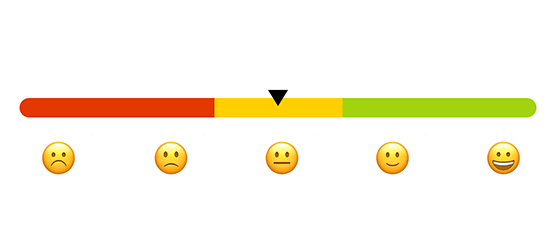

#### 10.Sentiment reviews of users:-

In [ ]:
#Sentiment counting of users
user_reviews.groupby('Sentiment').count() 

In [ ]:
#Percentage of Review Sentiments
counts = list(user_reviews['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (10, 15)
plt.pie(counts, labels=labels, explode=[0.01, 0.05, 0.05],shadow=True, autopct="%.2f%%")
plt.title('Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend(bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Positive reviews are 64.12%
Negative reviews are 22.10%
Neutral reviews are 13.78%

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code
#Apps with the highest number of positive reviews
# positive reviews
positive_ur_df=user_reviews[user_reviews['Sentiment']=='Positive']
positive_ur_df

In [ ]:
positive_ur_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(10,8),color='lime').invert_yaxis()
plt.title("Top 10 positive review apps")
plt.xlabel('Total number of positive reviews')
plt.legend()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
#Apps with the highest number of negative reviews.
negative_ur_df=user_reviews[user_reviews['Sentiment']=='Negative']
negative_ur_df

In [ ]:
negative_ur_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(15,8),color='crimson').invert_yaxis()
plt.title("Top 10 negative review apps")
plt.xlabel('Total number of negative reviews')
plt.legend()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [ ]:
#Apps with the number of neutral reviews.
neutral_ur_df=user_reviews[user_reviews['Sentiment']=='Neutral']
neutral_ur_df

In [ ]:
neutral_ur_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(15,8),color='sandybrown').invert_yaxis()
plt.title("Top 10 neutral review apps")
plt.xlabel('Total number of neutral reviews')
plt.legend()

#### 12.Are sentiment subjectivity and sentiment polarity inversely correlated:-

In [ ]:
# Scatterplot of sentiment polarity and sentiment subjectivity.
plt.figure(figsize=(20, 10))
sns.scatterplot(user_reviews['Sentiment_Subjectivity'], user_reviews['Sentiment_Polarity'],
                hue = user_reviews['Sentiment'], edgecolor='white', palette="husl")
plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The scatter figure above illustrates that sentiment subjectivity is most often related to sentiment polarity when variance is too high or too low, although that is not always the case.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### 13.Histogram of Subjectivity:-

In [ ]:
#Histogram of Subjectivity Analysis.
user_reviews.Sentiment_Subjectivity.value_counts()

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(user_reviews[user_reviews['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that maximum number of users give reviews to the applications, according to their experience.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
play_store_data.corr()

In [ ]:
# Heatmap for play_store_data
plt.figure(figsize = (20,10))
sns.heatmap(play_store_data.corr(),cmap="YlGnBu", annot= True)
plt.title('Corelation Heatmap for Playstore Data', size=20)

##### 1. Why did you pick the specific chart?

We pick that chart because we want to get findings in correlation between different columns in the play store data.

##### 2. What is/are the insight(s) found from the chart?

The Reviews and Installs columns have a significant positive association. This is essentially evident. The number of installs, user base, and overall reviews dropped by users all increase as the number of installs increases.
The Price has a weakly inverse relationship to the Rating, Reviews, and Installs. This translates to a minor decline in the average rating, overall number of reviews, and installs when the app's price rises.
The Installs and Reviews column and the Rating have a weakly positive correlation. This suggests that as the average user rating rises, so do the number of app installs and reviews.

#### 15.Pairwise plot between each quantitative variable to search for any patterns or connections between the features that stand out. 

In [ ]:
# Pair Plot visualization code
pp=sns.pairplot(play_store_data)
pp.fig.suptitle("Distribution and relation of data ", y=1.00,fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

Pair plots are used to determine the most distinct clusters or the best combination of features to describe a connection between two variables. By creating some straightforward linear separations or basic lines in our data set, it also helps to create some straightforward classification models.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Since the majority of apps are free and the least studied areas, such as events and cosmetics, should be given greater attention by businesses, in our opinion. Focusing on free apps is also more crucial. Apart from this The likelihood of obtaining the highest installs will increase if developers concentrate more on making content accessible to everyone. They also need to concentrate on regularly updating their apps to draw in more users. Finally, they need to keep in mind that user sentiments change as they use the app, so they should concentrate more on the features and needs of their users.

# **Conclusion**

Using the project at hand, we have determined that:-


1.

